In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/covid_19/worldometer_coronavirus_daily_data.csv')
dataset.head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-2-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-2-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-2-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-2-19,Afghanistan,0.0,NaN,0.0,0.0,NaN


In [3]:
dataset2 = pd.read_csv('/content/drive/MyDrive/covid_19/worldometer_coronavirus_summary_data.csv')
dataset2.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945
2,Algeria,Africa,265816,6875.0,178371.0,80570.0,6.0,5865,152.0,230861.0,5093.0,45325517
3,Andorra,Europe,42156,153.0,41021.0,982.0,14.0,543983,1974.0,249838.0,3223924.0,77495
4,Angola,Africa,99194,1900.0,97149.0,145.0,NaN,2853,55.0,1499795.0,43136.0,34769277


In [4]:
dataset['date'] = pd.to_datetime(dataset['date'])
dataset['month_year'] = dataset['date'].dt.to_period('M')
dataset = dataset[dataset['country'].isin(['Germany','UK'])].copy()
# dataset = dataset[dataset['country'] == dataset['country'].iloc[0]]


In [5]:
dataset['country'].value_counts()

country
Germany    820
UK         820
Name: count, dtype: int64

In [6]:
# Check if 'Germany' and 'UK' are present in the 'country' column
is_germany_present = 'Germany' in dataset2['country'].values
is_uk_present = 'UK' in dataset2['country'].values

# Print the results
print(f"Germany present in dataset: {is_germany_present}")
print(f"UK present in dataset: {is_uk_present}")


Germany present in dataset: True
UK present in dataset: True


In [7]:
new_dataset = pd.merge(dataset, dataset2, on='country')
new_dataset.head(5)

,date,country,cumulative_total_cases,daily_new_cases,active_cases_x,cumulative_total_deaths,daily_new_deaths,month_year,continent,total_confirmed,total_deaths,total_recovered,active_cases_y,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,2020-02-15,Germany,16.0,NaN,13.0,0.0,NaN,2020-02,Europe,25780226,137919.0,23956700.0,1685607.0,1279.0,305877,1636.0,122332384.0,1451450.0,84282880
1,2020-02-16,Germany,16.0,0.0,13.0,0.0,NaN,2020-02,Europe,25780226,137919.0,23956700.0,1685607.0,1279.0,305877,1636.0,122332384.0,1451450.0,84282880
2,2020-02-17,Germany,16.0,0.0,9.0,0.0,NaN,2020-02,Europe,25780226,137919.0,23956700.0,1685607.0,1279.0,305877,1636.0,122332384.0,1451450.0,84282880
3,2020-02-18,Germany,16.0,0.0,7.0,0.0,NaN,2020-02,Europe,25780226,137919.0,23956700.0,1685607.0,1279.0,305877,1636.0,122332384.0,1451450.0,84282880
4,2020-02-19,Germany,16.0,0.0,7.0,0.0,NaN,2020-02,Europe,25780226,137919.0,23956700.0,1685607.0,1279.0,305877,1636.0,122332384.0,1451450.0,84282880


In [8]:
new_dataset['country'].value_counts()

country
Germany    820
UK         820
Name: count, dtype: int64

In [9]:
dataset.columns , dataset2.columns

(Index(['date', 'country', 'cumulative_total_cases', 'daily_new_cases',
        'active_cases', 'cumulative_total_deaths', 'daily_new_deaths',
        'month_year'],
       dtype='object'),
 Index(['country', 'continent', 'total_confirmed', 'total_deaths',
        'total_recovered', 'active_cases', 'serious_or_critical',
        'total_cases_per_1m_population', 'total_deaths_per_1m_population',
        'total_tests', 'total_tests_per_1m_population', 'population'],
       dtype='object'))

In [10]:
# downloading the dataset
new_dataset.to_csv('new_dataset1.csv', index=False)
#convert the date column to a string format
if new_dataset['date'].dtype != 'object':
    new_dataset['date'] = new_dataset['date'].astype(str)

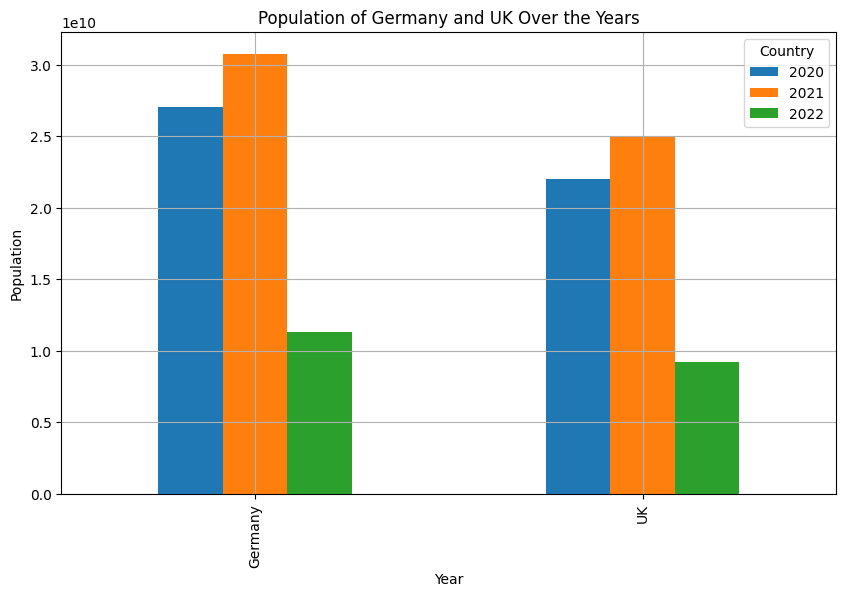

In [11]:
# Population of Germany and UK Over the Years

new_dataset['year'] = new_dataset['date'].str[:4]
germany_uk_population = new_dataset[new_dataset['country'].isin(['Germany', 'UK'])]
population_by_country_year = germany_uk_population.groupby(['country', 'year'])['population'].sum().unstack()
population_by_country_year.plot(kind='bar', figsize=(10, 6))
plt.title('Population of Germany and UK Over the Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.legend(title='Country')
plt.show()


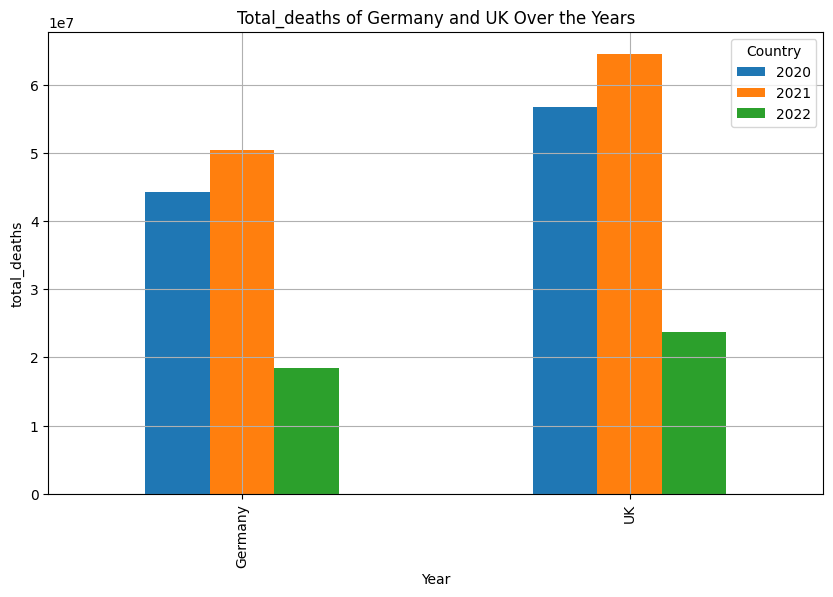

In [12]:
# Total_deaths of Germany and UK Over the Years
germany_uk_population = new_dataset[new_dataset['country'].isin(['Germany', 'UK'])]
population_by_country_year = germany_uk_population.groupby(['country', 'year'])['total_deaths'].sum().unstack()
population_by_country_year.plot(kind='bar', figsize=(10, 6))
plt.title('Total_deaths of Germany and UK Over the Years')
plt.xlabel('Year')
plt.ylabel('total_deaths')
plt.grid(True)
plt.legend(title='Country')
plt.show()

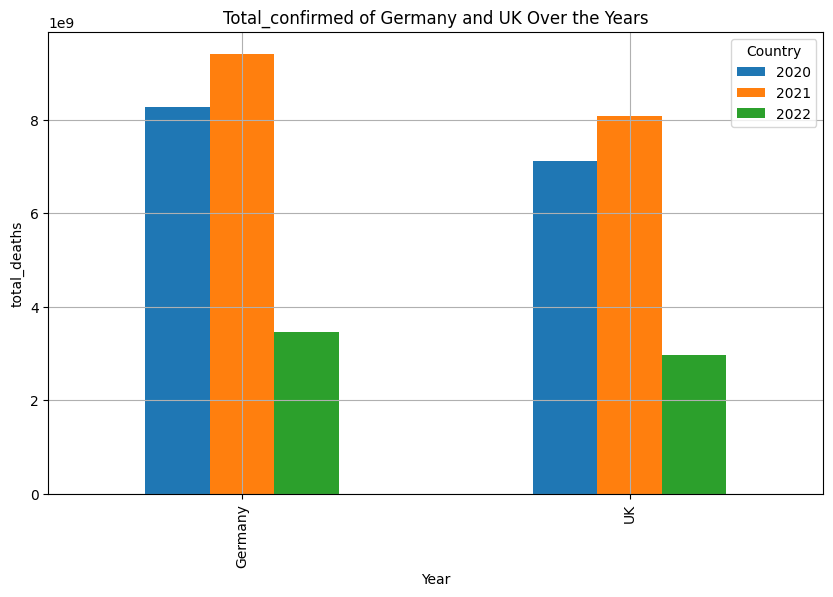

In [13]:
total_confirmed = new_dataset[new_dataset['country'].isin(['Germany', 'UK'])]
population_by_country_year = total_confirmed.groupby(['country', 'year'])['total_confirmed'].sum().unstack()
population_by_country_year.plot(kind='bar', figsize=(10, 6))
plt.title('Total_confirmed of Germany and UK Over the Years')
plt.xlabel('Year')
plt.ylabel('total_deaths')
plt.grid(True)
plt.legend(title='Country')
plt.show()

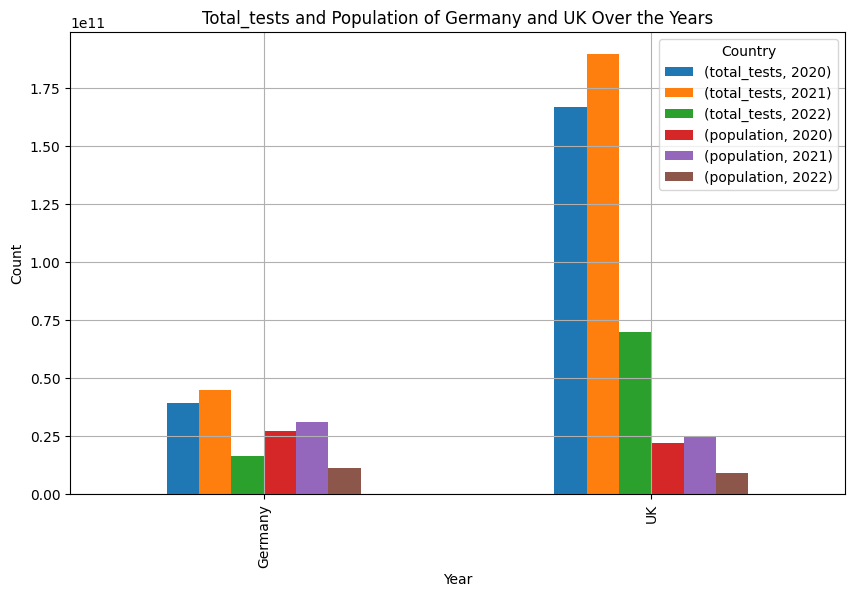

In [14]:
# Total_tests and Population of Germany and UK Over the Years
population_by_country_year = new_dataset.groupby(['country', 'year'])[['total_tests', 'population']].sum().unstack()
population_by_country_year.plot(kind='bar', figsize=(10, 6))
plt.title('Total_tests and Population of Germany and UK Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.legend(title='Country')
plt.show()